In [2]:
import yfinance as yf
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

In [ ]:
start = dt.datetime(2015, 1, 28)
end = dt.datetime.now()

data = pd.DataFrame()

data["FEDFUNDS"] = web.DataReader('FEDFUNDS', 'fred', start, end)/100  # Tasa efectiva de fondos federales

data["Unemployment"] = web.DataReader('UNRATE', 'fred', start, end)/100  # Tasa de desempleo

#PCE
data["PCEPI"] = web.DataReader(['PCEPI'], 'fred', start, end)
data["PCEPILFE"] = web.DataReader(['PCEPILFE'], 'fred', start, end)

#CPI
data["CPI"]      = web.DataReader('CPIAUCSL', 'fred', start, end)  # Índice de precios al consumidor (CPI)
data["CPILFESL"] = web.DataReader('CPILFESL', 'fred', start, end)

data['DGS10'] = web.DataReader('DGS10', 'fred', start, end)  # 10-year Treasury bond yield
data['DGS2'] = web.DataReader('DGS2', 'fred', start, end)    # 2-year Treasury bond yield


In [3]:
#diff YoY and MoM
data["var_CPI_yoy"] = pd.DataFrame(data["CPI"].pct_change(12)*100)
data["var_CPI_mom"] = pd.DataFrame(data["CPI"].pct_change(1)*100)
data["var_core_CPI_yoy"] = pd.DataFrame(data["CPILFESL"].pct_change(12)*100)
data["var_core_CPI_mom"] = pd.DataFrame(data["CPILFESL"].pct_change(1)*100)

data["var_PCEPI_yoy"] = pd.DataFrame(data["PCEPI"].pct_change(12)*100)
data["var_PCEPI_mom"] = pd.DataFrame(data["PCEPI"].pct_change(1)*100)
data["var_Core_PCE_yoy"] = pd.DataFrame(data["PCEPILFE"].pct_change(12)*100)
data["var_Core_PCE_mom"] = pd.DataFrame(data["PCEPILFE"].pct_change(1)*100)

# Limpiar los datos, eliminando filas con valores nulos
# data = data.dropna()
data = data.iloc[13:]

# DATA["FEDFUNDS"].las() = 5.00

data.to_excel("data_US.xlsx",sheet_name="data_US")

C:\Users\HP SUPPORT\AppData\Local\Temp\ipykernel_23300\3606793810.py:18: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  data.to_excel("data_US.xlsx",sheet_name="data_US")


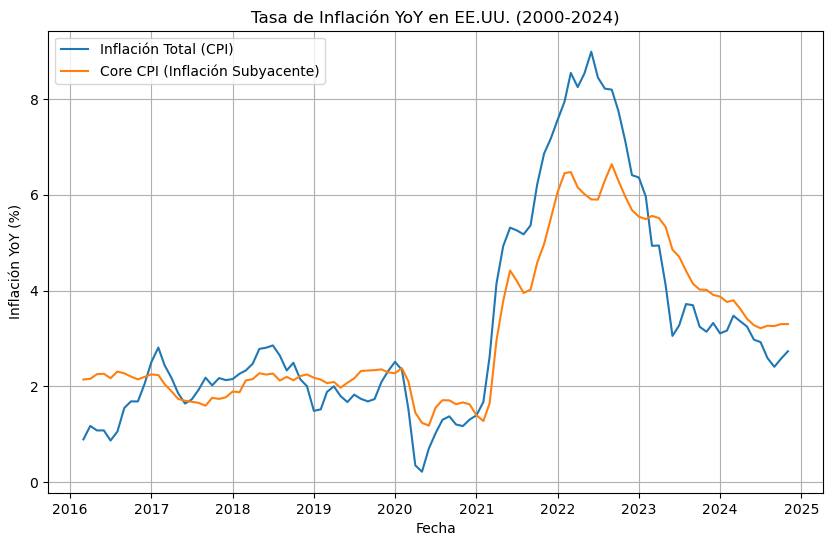

In [5]:
# Graficar las tasas de inflación interanual
plt.figure(figsize=(10, 6))
plt.plot(data["var_CPI_yoy"], label='Inflación Total (CPI)')
plt.plot(data["var_core_CPI_yoy"], label='Core CPI (Inflación Subyacente)')

# Añadir títulos y etiquetas
plt.title('Tasa de Inflación YoY en EE.UU. (2000-2024)')
plt.xlabel('Fecha')
plt.ylabel('Inflación YoY (%)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


C:\Users\HP SUPPORT\AppData\Local\Temp\ipykernel_23300\1332639914.py:19: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  pce.to_excel("data_ECONOMICA.xlsx",sheet_name="data_ECONOMICA")


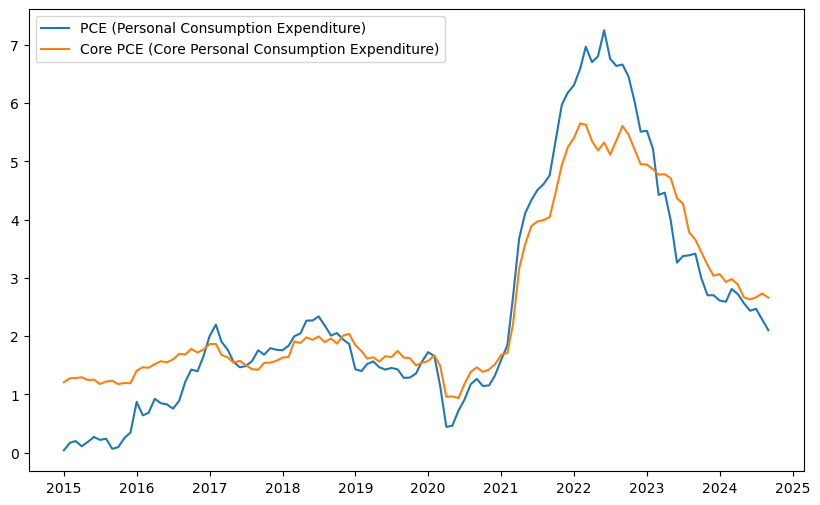

In [6]:
# Definir el rango de fechas
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2024, 9, 30)

# Obtener los datos del PCE (Personal Consumption Expenditures) y Core PCE de la economía de EE.UU. de la FRED
pce = web.DataReader(['PCEPI', 'PCEPILFE'], 'fred', start, end)


pce["var_PCEPI"] = pd.DataFrame(pce["PCEPI"].pct_change(12)*100)
pce["var_PCEPOILFE"] = pd.DataFrame(pce["PCEPILFE"].pct_change(12)*100)

pce = pce.dropna()

pce.to_excel("data_ECONOMICA.xlsx",sheet_name="data_ECONOMICA")

plt.figure(figsize=(10, 6))
plt.plot(pce["var_PCEPI"],label='PCE (Personal Consumption Expenditure)')
plt.plot(pce["var_PCEPOILFE"],label='Core PCE (Core Personal Consumption Expenditure)')
plt.legend()
plt.show()
